In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()



Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [5]:
### to read first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
# Checking dataset structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [4]:
import pandas as pd
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')
df.head()



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
import pandas as pd

# Load Excel dataset
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')  # replace with your file path if needed

# Strip spaces from column names to avoid KeyErrors
df.columns = df.columns.str.strip()

# Drop columns with almost all missing values (safe even if column doesn't exist)
df.drop(columns=['license'], inplace=True, errors='ignore')

# ------------------------------
# Fill missing categorical values
# ------------------------------

df['NAME'].fillna('Unknown', inplace=True)  # missing listing names
df['host_identity_verified'].fillna('No', inplace=True)  # unverified hosts
df['neighbourhood group'].fillna(df['neighbourhood group'].mode()[0], inplace=True)  # most common group
df['neighbourhood'].fillna(df['neighbourhood'].mode()[0], inplace=True)  # most common neighbourhood
df['country'].fillna('Unknown', inplace=True)
df['country code'].fillna('Unknown', inplace=True)
df['cancellation_policy'].fillna('unknown', inplace=True)

# ------------------------------
# Fill missing numerical values
# ------------------------------

df['price'].fillna(df['price'].median(), inplace=True)  # median is better than mean for skewed prices
df['minimum_nights'].fillna(df['minimum_nights'].median(), inplace=True)
df['number of reviews'].fillna(0, inplace=True)  # no reviews = 0
df['reviews per month'].fillna(0, inplace=True)  # no reviews per month = 0

# ------------------------------
# Quick check
# ------------------------------
print("Missing values after handling:")
print(df.isnull().sum())



In [8]:
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,408
neighbourhood group,0
neighbourhood,0
lat,8
long,8
country,0


In [ ]:
# Fill small missing categorical columns
df['host_name'].fillna('Unknown', inplace=True)
df['instant_bookable'].fillna('No', inplace=True)

# Fill small missing numerical columns
df['lat'].fillna(df['lat'].median(), inplace=True)
df['long'].fillna(df['long'].median(), inplace=True)
df['Construction year'].fillna(df['Construction year'].median(), inplace=True)
df['service fee'].fillna(df['service fee'].median(), inplace=True)
df['review rate number'].fillna(df['review rate number'].median(), inplace=True)
df['calculated host listings count'].fillna(df['calculated host listings count'].median(), inplace=True)
df['availability 365'].fillna(df['availability 365'].median(), inplace=True)

# For 'last review', if you want, fill with placeholder
df['last_review'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

# Drop 'house_rules' column (too many missing)
df.drop(columns=['house_rules'], inplace=True)


In [ ]:
df.isnull().sum()


In [11]:
# Summary statistics for numerical columns
df.describe()

# Summary for categorical columns
df.describe(include='object')


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type
count,102599,102599,102599,102599,102599,102599,102599,102599.0,102599,102599
unique,61281,3,13190,7,224,2,2,3.0,4,4
top,Unknown,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,0.0,moderate,Entire home/apt
freq,270,51200,881,43821,7953,102067,102468,51474.0,34343,53701


In [12]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599,102599.000000,102599.000000,102599.000000,102599.000000
mean,2.914623e+07,4.925411e+10,40.728093,-73.949644,2012.486447,625.290422,125.026852,8.115371,27.434722,2016-06-07 00:01:35.158822400,1.161368,3.278219,7.915038,140.936179
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2000-01-01 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2008.000000,341.000000,68.000000,2.000000,1.000000,2017-07-31 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,912.000000,182.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055854,0.049519,5.759583,331.272137,66.237438,30.494537,49.478373,NaN,1.680924,1.282711,32.170972,135.171770


In [13]:
## types of rooms
df['room type'].value_counts()

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


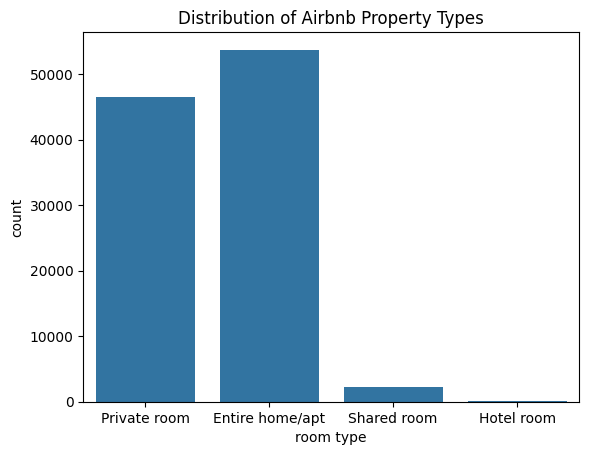

In [14]:
## wich room type is most commom
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='room type', data=df)
plt.title('Distribution of Airbnb Property Types')
plt.show()


In [15]:
## neighborhood with highest number of listings
df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43821
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


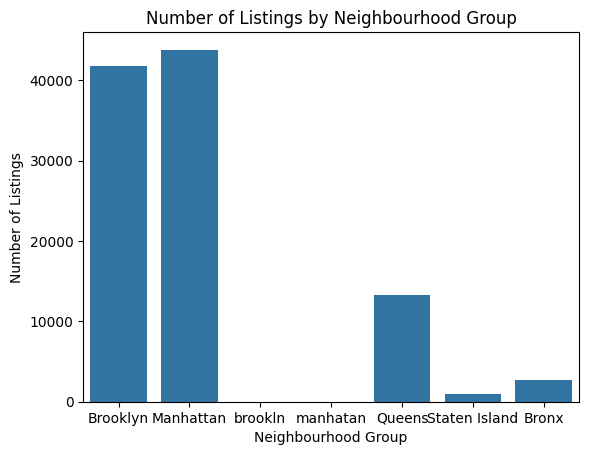

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='neighbourhood group', data=df)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


In [17]:
## neighborhood with highest listing prices
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
avg_price


,price
neighbourhood group,
Queens,630.192206
Bronx,627.756637
Brooklyn,626.556498
Staten Island,624.489005
Manhattan,622.467128
brookln,580.000000
manhatan,460.000000


In [18]:
## relationship between construction year and price
df[['Construction year','price']].corr()


,Construction year,price
Construction year,1.000000,-0.003732
price,-0.003732,1.000000


from matplotlib import pyplot as plt
_df_0['Construction year'].plot(kind='hist', bins=20, title='Construction year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Construction year', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price']
  ys = series['Construction year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('Construction year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price'}, axis=1)
              .sort_values('price', ascending=True))
  xs = counted['price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Construction year'].plot(kind='line', figsize=(8, 4), title='Construction year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
## Top 10 hosts by listing count
top_hosts = df[['host id', 'host name', 'calculated host listings count']].sort_values(
    by='calculated host listings count', ascending=False).head(10)

top_hosts


,host id,host name,calculated host listings count
67153,18344435096,Blueground,332.0
67152,83842788941,Blueground,332.0
67159,72619494405,Blueground,332.0
64894,52360647654,Blueground,332.0
63337,31759913186,Blueground,332.0
62920,6866703084,Blueground,332.0
64409,28199312869,Blueground,332.0
64543,83412943157,Blueground,332.0
64579,45153317531,Blueground,332.0
66808,67585934289,Blueground,332.0


In [20]:
# Average number of reviews per host based on verification
df.groupby('host_identity_verified')[['number of reviews','reviews per month']].mean()


,number of reviews,reviews per month
host_identity_verified,,
No,46.266436,1.228235
unconfirmed,27.496035,1.160443
verified,27.266817,1.161917


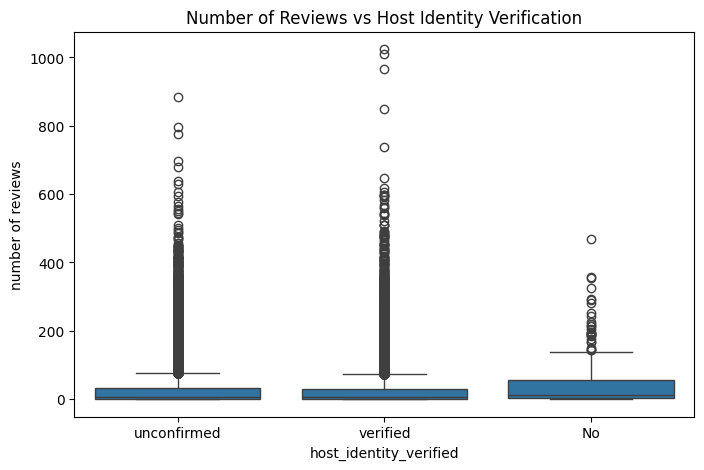

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='host_identity_verified', y='number of reviews', data=df)
plt.title('Number of Reviews vs Host Identity Verification')
plt.show()


In [22]:
# Correlation between price and service fee
df[['price', 'service fee']].corr()


,price,service fee
price,1.000000,0.997837
service fee,0.997837,1.000000


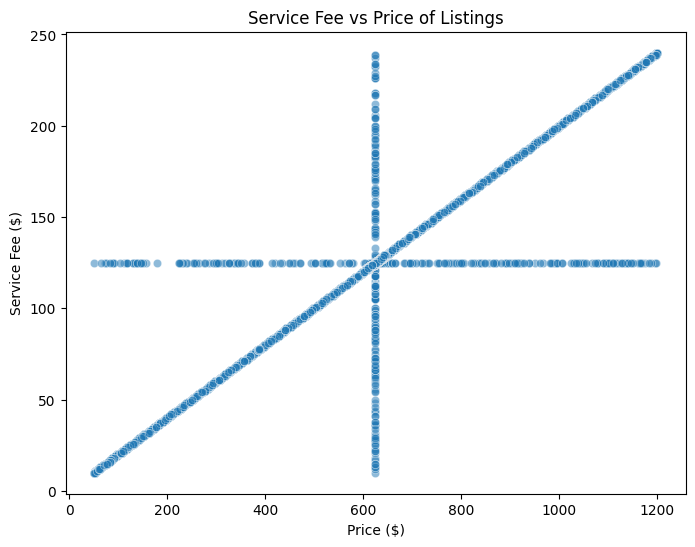

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='price', y='service fee', data=df, alpha=0.5)
plt.title('Service Fee vs Price of Listings')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.show()


In [24]:
# Overall average review rate
avg_review_rate = df['review rate number'].mean()
avg_review_rate


np.float64(3.2782190859560036)

In [25]:
# Average review rate by neighbourhood group
df.groupby('neighbourhood group')['review rate number'].mean()


,review rate number
neighbourhood group,
Bronx,3.331121
Brooklyn,3.258329
Manhattan,3.275644
Queens,3.329615
Staten Island,3.403141
brookln,4.000000
manhatan,3.000000


In [26]:
# Average review rate by room type
df.groupby('room type')['review rate number'].mean()


,review rate number
room type,
Entire home/apt,3.274092
Hotel room,3.534483
Private room,3.280930
Shared room,3.307727


In [27]:
# Average review rate by neighbourhood group and room type
df.groupby(['neighbourhood group','room type'])['review rate number'].mean().unstack()


room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.344423,NaN,3.327400,3.264957
Brooklyn,3.249672,3.75,3.263727,3.335758
Manhattan,3.274883,3.50,3.276546,3.256891
Queens,3.348815,3.75,3.314282,3.375691
Staten Island,3.327004,NaN,3.476395,3.533333
brookln,NaN,NaN,4.000000,NaN
manhatan,NaN,NaN,3.000000,NaN


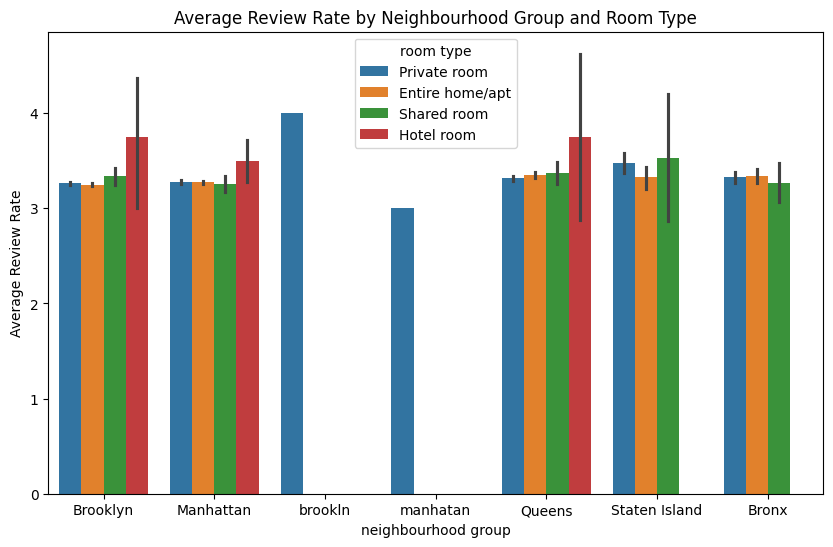

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=df)
plt.title('Average Review Rate by Neighbourhood Group and Room Type')
plt.ylabel('Average Review Rate')
plt.show()


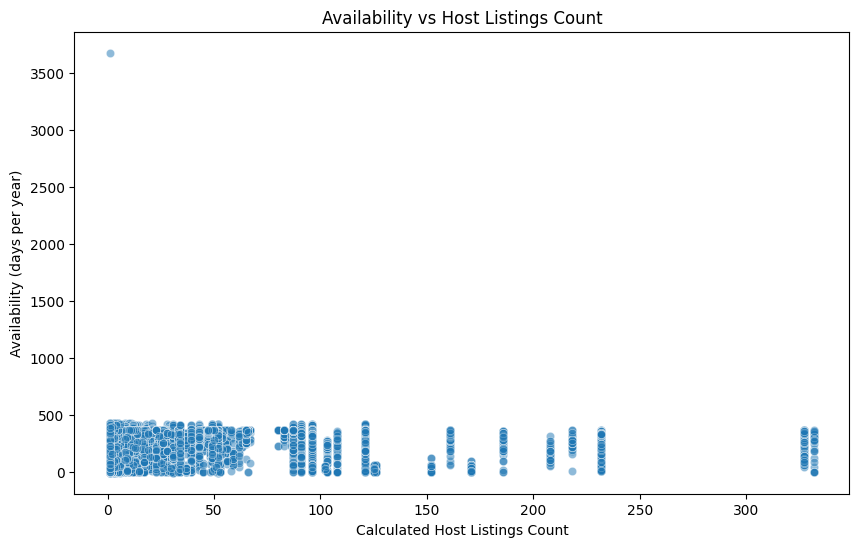

In [29]:
##are hosts with higher calculated host listings count more likely to maintain higher availability throughout the year
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated host listings count', y='availability 365', data=df, alpha=0.5)
plt.title('Availability vs Host Listings Count')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (days per year)')
plt.show()


In [30]:
df[['calculated host listings count', 'availability 365']].corr()


,calculated host listings count,availability 365
calculated host listings count,1.000000,0.158876
availability 365,0.158876,1.000000


In [31]:
# Group hosts by number of listings and calculate average availability
df.groupby('calculated host listings count')['availability 365'].mean().sort_values(ascending=False).head(10)


,availability 365
calculated host listings count,
44.0,348.547619
66.0,348.080645
83.0,346.305085
55.0,342.666667
65.0,339.008000
67.0,338.884615
47.0,335.741935
58.0,329.541667
54.0,327.446809
